In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from PIL import Image
import matplotlib as mpl
import matplotlib.patheffects
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.image as mpimg
from mplsoccer import Pitch, add_image
from adjustText import adjust_text
from highlight_text import htext
from pywaffle import Waffle
import math
import requests
from bs4 import BeautifulSoup
import json
from mplsoccer import VerticalPitch,FontManager,add_image
from matplotlib.colors import LinearSegmentedColormap
from urllib.request import urlopen
from PIL import Image

In [2]:
background = '#ffffff'
text_color = '#ffffff'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='cmb10'
mpl.rcParams['legend.fontsize'] = 15

#Loading Some Fonts
# URL = 'https://github.com/googlefonts/robotoslab/blob/main/fonts/static/RobotoSlab-Bold.ttf?raw=true'
# URL2 = 'https://github.com/googlefonts/robotoslab/blob/main/fonts/static/RobotoSlab-Light.ttf?raw=true'
# URL3 = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-Italic.ttf?raw=true'
URL4 = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'
# URL5 = 'https://github.com/googlefonts/rubik/tree/main/fonts/ttf/Rubik-Medium.ttf?raw=true'

# # font_regular = FontManager(URL2)
# font_regular2 = FontManager(URL3)
# font_regular3 = FontManager(URL5)


# font_bold = FontManager(URL)
# font_label = FontManager(URL)
font_label2 = FontManager(URL4)

pitch_color = '#131313'
oneColor = "#B94B5F"
theOtherColor = '#BB1D3A'

cmap_color1 = oneColor
cmap_color2 = theOtherColor

cmapA = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color1], N=100)
cmapB = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color2], N=100)

In [95]:
df = pd.read_csv("/work/scrayper/understats/datasets/epl/shots_epl_20-21.csv")
team = df[(df["h_team"]=="Wolverhampton Wanderers")|(df["a_team"]=="Wolverhampton Wanderers")]
teamShot = len(team)
teamGoal = len(team[team["result"]=="Goal"])

In [96]:
df = df[df["player"].str.contains("Adama")]
df.reset_index(inplace=True, drop=True)

pkgoal = df[df["situation"]=="Penalty"]
pk = len(pkgoal[pkgoal["result"]=="Goal"])


df = df[df["situation"]!="Penalty"]

goal = len(df[df["result"]=="Goal"])

teamGoalPer = round(goal/teamGoal * 100,2)
teamShotPer = round(len(df)/teamShot*100,2)

In [97]:
from matplotlib.patches import Circle, Rectangle, Arc

def media_cancha_vertical(ax=None, color='#495E62', lw=.8, outer_lines=True):
    if ax is None:
        ax = plt.gca()

    area_grande = Rectangle((.204,1), 0.592, -0.165, linewidth=lw, color=color, fill=False)
    area_pequeña = Rectangle((0.352,1), 0.296, -0.05, linewidth=lw, color=color, fill=False)

    porteria = Rectangle((.44, 1), 0.12, 0.014, linewidth=lw, color=color, fill=False)
    arco_area = Arc((0.5,0.845), 0.2, 0.065, theta1=185, theta2=355, linewidth=lw, color=color)
    corner_1 = Arc((1, 1), 0.12, 0.048, theta1=180, theta2=270, linewidth=lw, color=color)
    corner_2 = Arc((0, 1), 0.12, 0.048, theta1=270, theta2=360, linewidth=lw, color=color)

    court_elements=[area_grande, area_pequeña, porteria, arco_area, corner_1, corner_2]

    if outer_lines:
        outer_lines = Rectangle((0,1), 0, -4, linewidth=lw, color=color, fill=False)
        outer_lines2 = Rectangle((1,1), 0, -4, linewidth=lw, color=color, fill=False)
        outer_lines3 = Rectangle((0,1), 1, 0, linewidth=lw, color=color, fill=False)
        
        court_elements.append(outer_lines)
        court_elements.append(outer_lines2)
        court_elements.append(outer_lines3)
        

    for element in court_elements:
        ax.add_patch(element)
    
        
    return ax



In [98]:
print(df["result"].unique())

['MissedShots' 'BlockedShot' 'SavedShot' 'Goal' 'ShotOnPost']


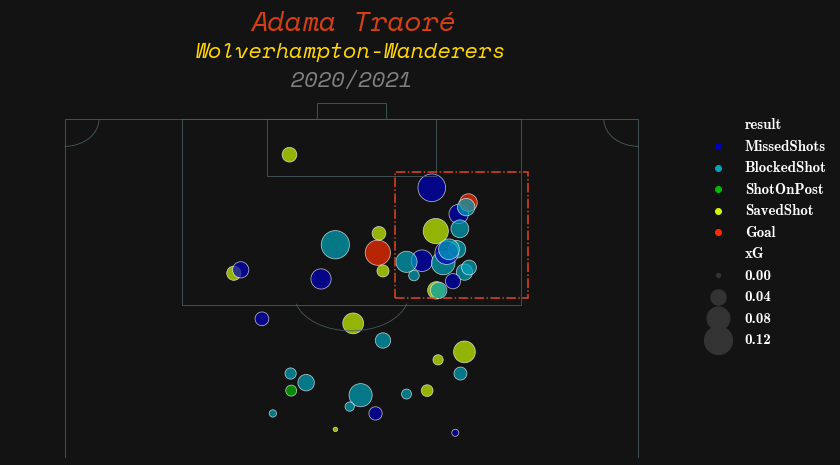

In [99]:
df["X_vert"]=df["X"]*1.01
df["Y_vert"]=df["Y"]

spaceMono_italy = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-Italic.ttf?raw=true'
monoIFont = FontManager(spaceMono_italy)
myFont = monoIFont

playerName = "Adama Traoré"
season = "2020/2021"

sns.relplot(x="Y_vert", y="X_vert",size="xG", hue="result", 
            hue_order=['MissedShots', 'BlockedShot', 'ShotOnPost', 'SavedShot','Goal'],
            sizes=(20, 800), alpha=.7, palette="nipy_spectral",
            height=7, aspect=1.5, data=df)

plt.gcf().set_facecolor("#131313")
media_cancha_vertical(outer_lines=True)
plt.xlim(-.1,1.1)
plt.ylim(.7,1.1)
plt.axis("off")
plt.gca().invert_xaxis()

plt.text(0.5, 1.06, f'Wolverhampton-Wanderers', color='gold', va='center', ha='center', fontproperties=myFont.prop, fontsize=22)
plt.text(0.495, 1.085, f'{playerName}', color='#D63E13', va='center', ha='center', fontproperties=myFont.prop, fontsize=28)
plt.text(0.5, 1.035, f'{season}', color='gray', va='center', ha='center', fontproperties=myFont.prop, fontsize=22)


# plt.plot((1,0),(0.834,0.834),"#006466",linestyle = ":")
# plt.plot((1,0),(0.95,0.95),"#006466",linestyle = ":")


arrow_dict = dict(arrowstyle = "->",
                  connectionstyle = "angle3", 
                  color = "#006466")

# plt.gca().annotate("  " + "OutSideBox",
#                    xy = (1, .75), size = 14, xytext = (1.2, .8),
#                    color = text_color, arrowprops = arrow_dict)

# plt.gca().annotate("  " + "PenaltyArea",
#                    xy = (1, .88), size = 14, xytext = (1.2, .93),
#                    color = text_color, arrowprops = arrow_dict)

# plt.gca().annotate("  " + "6YardBox",
#                    xy = (1, .97), size = 14, xytext = (1.2, 1.02),
#                    color = text_color, arrowprops = arrow_dict)



# plt.plot((0.44,0.44),(0,1),"#006466",linestyle = ":")
# plt.plot((.56,0.56),(0,1),"#006466",linestyle = ":")

# plt.gca().annotate("  " + "Left",
#                    xy = (.8, .75), size = 14, xytext = (.99, .71),
#                    color = text_color)

# plt.gca().annotate("  " + "Center",
#                    xy = (.5, .75), size = 14, xytext = (0.55, .71),
#                    color = text_color)

# plt.gca().annotate("  " + "Right",
#                    xy = (.2, .75), size = 14, xytext = (.11, .71),
#                    color = text_color)


plt.gcf().patches.extend([
    plt.Rectangle(
        (.5,.4),.15,.25,fill=False, alpha=1,
        linestyle="-.", edgecolor="#E4471B", linewidth=1.5, zorder=99,
        transform=plt.gcf().transFigure, figure=plt.gcf()
        
    )
])
plt.savefig(f'/work/output/shotmap{df.loc[1,"player"]}2021.png', dpi=200, bbox_inches="tight",facecolor='#131313')

In [93]:
base_url = 'https://understat.com/match/'
match = str(input('Please enter the match id: '))
url = base_url+match

html = requests.get(url)
soup = BeautifulSoup(html.content, 'lxml')
scripts = soup.find_all('script')

strings = scripts[1].string

index_start = strings.index("('")+2
index_end = strings.index("')")
json_data = strings[index_start:index_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

x = []
y = []
minute = []
xG = []
result = []
team = []
player = []
shotType = []
assist = []
situation = []
lastAct = []

data_away = data['a']
data_home = data['h']

# for index in range(len(data_home)):
#     for key in data_home[index]:
#         if key == 'X':
#             x.append(data_home[index][key])
#         if key == 'Y':
#             y.append(data_home[index][key])
#         if key == 'minute':
#             minute.append(data_home[index][key])
#         if key == 'h_team':
#             team.append(data_home[index][key])
#         if key == 'xG':
#             xG.append(data_home[index][key])
#         if key == 'result':
#             result.append(data_home[index][key])
#         if key == 'player':
#             player.append(data_home[index][key])
#         if key == 'player_assisted':
#             assist.append(data_home[index][key])
#         if key == 'shotType':
#             shotType.append(data_home[index][key])
#         if key == 'situation':
#             situation.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        elif key == 'Y':
            y.append(data_away[index][key])
        elif key == 'minute':
            minute.append(data_away[index][key])
        elif key == 'a_team':
            team.append(data_away[index][key])
        elif key == 'xG':
            xG.append(data_away[index][key])
        elif key == 'result':
            result.append(data_away[index][key])
        elif key == 'player':
            player.append(data_away[index][key])
        elif key == 'player_assisted':
            assist.append(data_away[index][key])
        elif key == 'shotType':
            shotType.append(data_away[index][key])
        elif key == 'situation':
            situation.append(data_away[index][key])


col_names = [ 'minute', 'team','player', 'x', 'y', 'xG', 'result', 'shotType','assist',"situation"]
df = pd.DataFrame([minute, team, player, x, y, xG ,result ,shotType, assist, situation],index=col_names)
df = df.T
df = df.astype({'x':float, 'y':float, 'minute':int, 'xG':float,'player':str, 'shotType':str, 'assist':str, 'team':str, "situation":str})

# comp = str(input("please input match number.")) # ex #1
# season = str(input("please input season."))
# team = str(input("please input target team."))

# path = f'/work/assets/understats/{season}/{team}/'
# if not os.path.exists(path):
#     os.makedirs(path)
# df.to_csv(path+comp+'.csv')

Please enter the match id:  aa


IndexError: list index out of range

In [112]:
def media_cancha_vertical(ax=None, color="#cccddd", lw=1, outer_lines=True):
    if ax is None:
        ax = plt.gca()

    area_grande = Rectangle((.204,1), 0.592, -0.165, linewidth=lw, color=color, fill=False)
    area_pequeña = Rectangle((0.352,1), 0.296, -0.05, linewidth=lw, color=color, fill=False)

    porteria = Rectangle((.44, 1), 0.12, 0.014, linewidth=lw, color=color, fill=False)
    arco_area = Arc((0.5,0.845), 0.2, 0.065, theta1=185, theta2=355, linewidth=lw, color=color)
    corner_1 = Arc((1, 1), 0.12, 0.048, theta1=180, theta2=270, linewidth=lw, color=color)
    corner_2 = Arc((0, 1), 0.12, 0.048, theta1=270, theta2=360, linewidth=lw, color=color)

    court_elements=[area_grande, area_pequeña, porteria, arco_area, corner_1, corner_2]

    if outer_lines:
        outer_lines = Rectangle((0,1), 0, -4, linewidth=lw, color=color, fill=False)
        outer_lines2 = Rectangle((1,1), 0, -4, linewidth=lw, color=color, fill=False)
        outer_lines3 = Rectangle((0,1), 1, 0, linewidth=lw, color=color, fill=False)
        
        court_elements.append(outer_lines)
        court_elements.append(outer_lines2)
        court_elements.append(outer_lines3)
        

    for element in court_elements:
        ax.add_patch(element)
    
        
    return ax

text_color = "#cccddd"

In [154]:
dfShot = len(df)
dfGoal = len(df[df["result"]=="Goal"])
df

,minute,team,player,x,y,xG,result,shotType,assist,situation
0,3,Chelsea,Ben Chilwell,0.907,0.560,0.308746,ShotOnPost,LeftFoot,Jorginho,SetPiece
1,13,Chelsea,Antonio Rüdiger,0.944,0.462,0.259435,Goal,Head,Ben Chilwell,FromCorner
2,16,Chelsea,N&#039;Golo Kanté,0.822,0.507,0.295763,SavedShot,RightFoot,Jorginho,OpenPlay
3,16,Chelsea,Kai Havertz,0.802,0.476,0.046540,BlockedShot,RightFoot,None,OpenPlay
4,21,Chelsea,Mason Mount,0.802,0.678,0.076195,MissedShots,RightFoot,None,DirectFreekick
5,27,Chelsea,N&#039;Golo Kanté,0.815,0.442,0.070223,Goal,LeftFoot,Reece James,OpenPlay
6,37,Chelsea,N&#039;Golo Kanté,0.898,0.450,0.119054,SavedShot,OtherBodyPart,Ben Chilwell,OpenPlay
7,45,Chelsea,Reece James,0.787,0.525,0.104998,BlockedShot,RightFoot,None,DirectFreekick
8,45,Chelsea,Trevoh Chalobah,0.735,0.313,0.011359,MissedShots,RightFoot,None,SetPiece
9,52,Chelsea,Ben Chilwell,0.850,0.618,0.077912,SavedShot,LeftFoot,Callum Hudson-Odoi,OpenPlay


In [114]:
df.reset_index(inplace=True, drop=True)

pkgoal = df[df["situation"]=="Penalty"]
pk = len(pkgoal[pkgoal["result"]=="Goal"])


df = df[df["situation"]!="Penalty"]

goal = len(df[df["result"]=="Goal"])

teamGoalPer = round(goal/dfGoal * 100,2)
teamShotPer = round(len(df)/dfShot*100,2)

oneColor = '#135ED6'
theOtherColor = '#BB1D3A'

In [123]:
pitch_color = '#131313'
text_color = '#fffeee'
oneColor = '#135ED6'
theOtherColor = '#BB1D3A'

cmap_color1 = oneColor
cmap_color2 = theOtherColor

cmapA = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, "#0d7ad9", "#f2c5bb", "#f24b4b",cmap_color1], N=100)
cmapB = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color2], N=100)

colors = cmapA(df['xG'] / df['xG'].max())


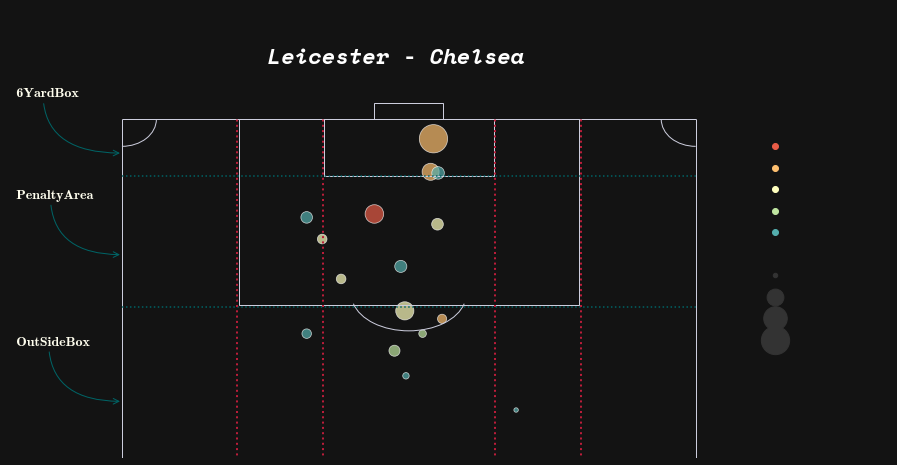

In [156]:
df["X_vert"]=df["x"]*1.01
df["Y_vert"]=df["y"]

sns.relplot(x="Y_vert", y="X_vert",size="xG", hue="result", legend='brief',
            sizes=(20, 800), alpha=.7, palette="Spectral",
            height=7, aspect=1.5, data=df)

plt.gcf().set_facecolor("#131313")
plt.text(x=.745, y=1.05, s=f'Leicester - Chelsea', color="#ffffff", fontproperties=font_label2.prop, fontsize=22)
media_cancha_vertical(outer_lines=True)
plt.xlim(-.1,1.1)
plt.ylim(.7,1.1)
plt.axis("off")

plt.gca().invert_xaxis()

plt.plot((1,0),(0.834,0.834),"#006466",linestyle = ":")
plt.plot((1,0),(0.95,0.95),"#006466",linestyle = ":")


arrow_dict = dict(arrowstyle = "->",
                  connectionstyle = "angle3", 
                  color = "#006466")

plt.gca().annotate("  " + "OutSideBox",
                   xy = (1, .75), size = 14, xytext = (1.2, .8),
                   color = text_color, arrowprops = arrow_dict)

plt.gca().annotate("  " + "PenaltyArea",
                   xy = (1, .88), size = 14, xytext = (1.2, .93),
                   color = text_color, arrowprops = arrow_dict)

plt.gca().annotate("  " + "6YardBox",
                   xy = (1, .97), size = 14, xytext = (1.2, 1.02),
                   color = text_color, arrowprops = arrow_dict)



# plt.plot((0.44,0.44),(0,1),"#006466",linestyle = ":")
# plt.plot((.56,0.56),(0,1),"#006466",linestyle = ":")

plt.plot((.2,0.2),(0,1),theOtherColor,linestyle = ":",lw=2)
plt.plot((0.35,0.35),(0,1),theOtherColor,linestyle = ":",lw=2)

plt.plot((.65,0.65),(0,1),theOtherColor,linestyle = ":",lw=2)
plt.plot((0.8,0.8),(0,1),theOtherColor,linestyle = ":",lw=2)

# plt.gca().fill((.2, .35, .2, .35),(-6,-6,1,1),color="gold",alpha=.1)
# plt.gca().fill((.65, .8, .65, .8),(-6,-6,1,1),color="gold",alpha=.1)


# plt.gca().annotate("  " + "Left",
#                    xy = (.8, .75), size = 14, xytext = (.99, .71),
#                    color = text_color)

# plt.gca().annotate("  " + "Center",
#                    xy = (.5, .75), size = 14, xytext = (0.55, .71),
#                    color = text_color)

# plt.gca().annotate("  " + "Right",
#                    xy = (.2, .75), size = 14, xytext = (.11, .71),
#                    color = text_color)



plt.savefig(f'/work/output/gol3.png', dpi=200, bbox_inches="tight",facecolor='#131313')